In [2]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
#Read tweets from csv file
df = pd.read_csv("SPvsCompound.csv")
df.head()

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Average of Compound
0,0,2017-10-10,2549.989990,2555.229980,2544.860107,2550.639893,2960500000,0.018745
1,1,2017-10-11,2550.620117,2555.239990,2547.949951,2555.239990,2976090000,0.115667
2,2,2017-10-12,2552.879883,2555.330078,2548.310059,2550.929932,3151510000,0.177133
3,3,2017-10-13,2555.659912,2557.649902,2552.090088,2553.169922,3149440000,0.017685
4,4,2017-10-16,2555.570068,2559.469971,2552.639893,2557.639893,2916020000,0.284189


In [8]:
df.shape

(44, 8)

In [7]:
df.dtypes

Unnamed: 0               int64
Date                    object
Open                   float64
High                   float64
Low                    float64
Close                  float64
Volume                   int64
Average of Compound    float64
dtype: object

In [11]:
close_values = df['Close'].unique()
compound_values = df['Average of Compound'].unique()

In [13]:
len(compound_values)

44

In [16]:
delta_close = []
delta_compound = []

for i in range(43):
    delta_close.append(float(close_values[i + 1]) - float(close_values[i]))
    delta_compound.append(float(compound_values[i + 1]) - float(compound_values[i]))


In [18]:
days = np.arange(43)

In [19]:
deltas_df = pd.DataFrame({'Day Number': days, 'Delta Compound': delta_compound, 'Delta Close': delta_close})
deltas_df.head()

,Day Number,Delta Close,Delta Compound
0,0,4.600097,0.096921
1,1,-4.310058,0.061467
2,2,2.239990,-0.159449
3,3,4.469971,0.266504
4,4,1.720214,-0.014711


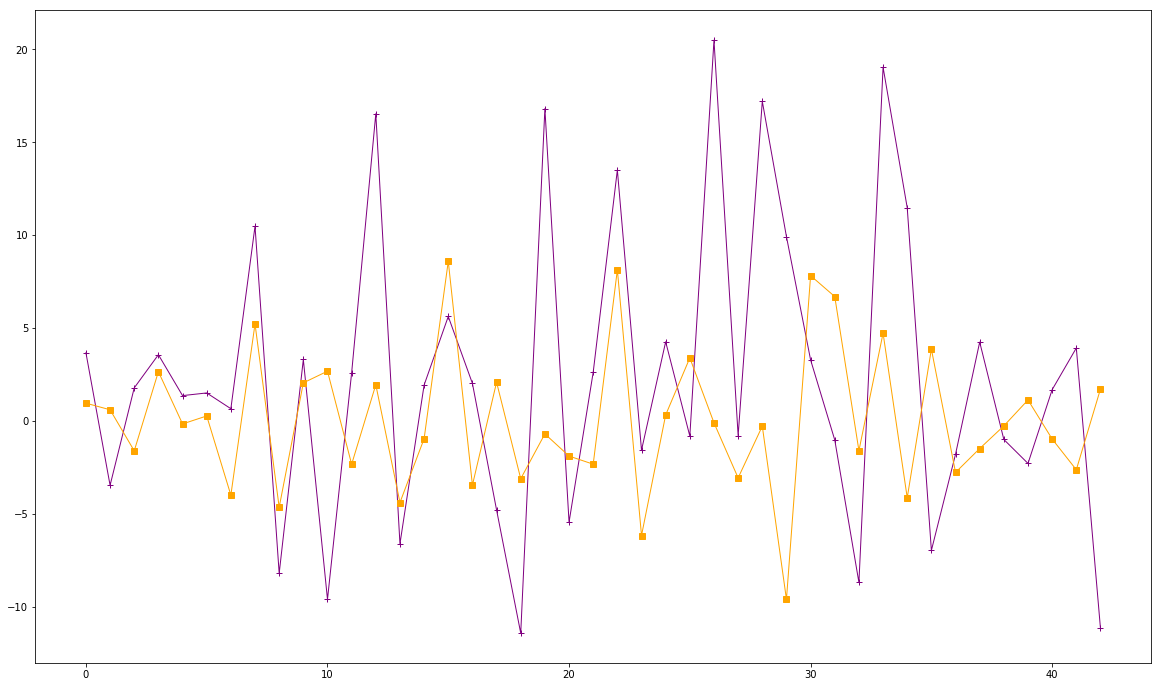

In [27]:
plt.figure(figsize=(20,12))
x_axis = deltas_df['Day Number']
# Create a handle for each plot
Compound = plt.plot(x_axis, deltas_df['Delta Close']*.8, marker="+",color="Purple", linewidth=1, label="Closing Price")
Approve = plt.plot(x_axis, deltas_df['Delta Compound']*10, marker="s", color="Orange", linewidth=1, label="Compound")

plt.show()

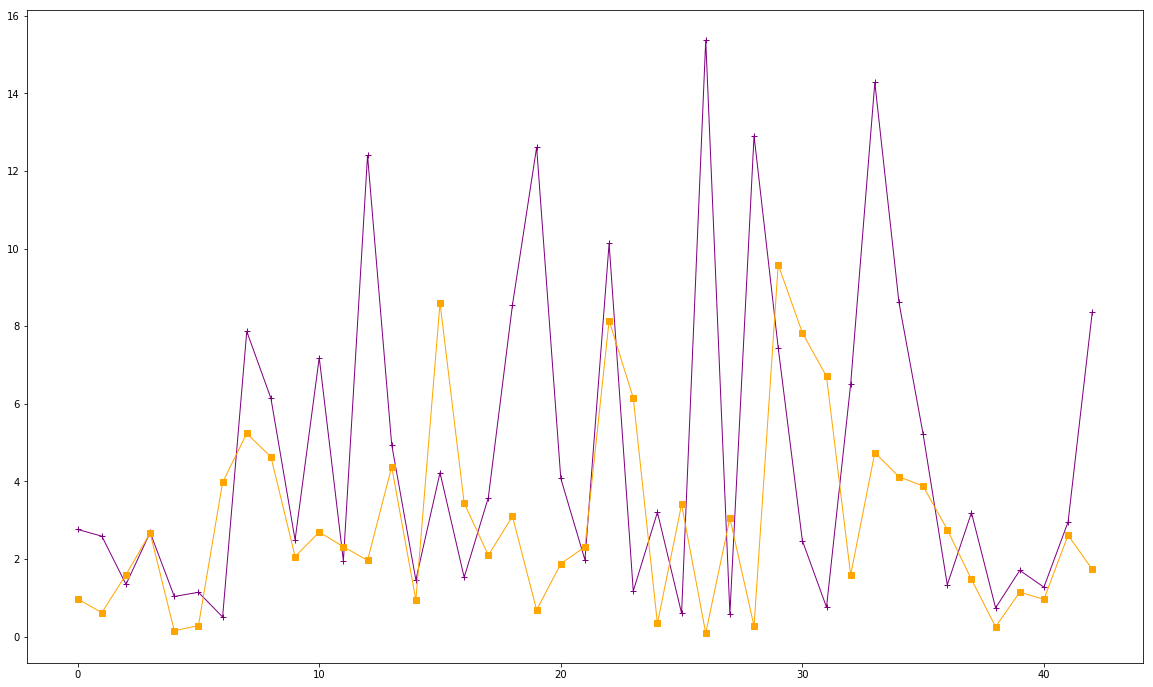

In [42]:
plt.figure(figsize=(20,12))
x_axis = deltas_df['Day Number']
# Create a handle for each plot
Compound = plt.plot(x_axis, np.sqrt(np.square(deltas_df['Delta Close']*.6)), marker="+",color="Purple", linewidth=1, label="Closing Price")
Approve = plt.plot(x_axis, np.sqrt(np.square(deltas_df['Delta Compound']*10)), marker="s", color="Orange", linewidth=1, label="Compound")

plt.show()

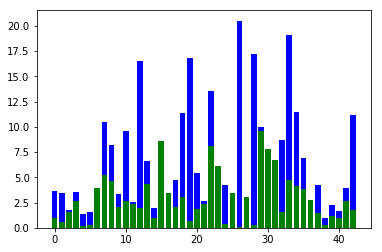

In [44]:
#Create a barplot for sentiment analysis and approval
plt.bar(x_axis, np.sqrt(np.square(deltas_df['Delta Close']*.8)), color="blue")
plt.bar(x_axis, np.sqrt(np.square(deltas_df['Delta Compound']*10)), color="green")
plt.show()